In [117]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [118]:
def central_field_approximation(r : float, Z : float) -> float:
	return Z * 4*r*r*np.exp(-2*Z*r)

In [119]:
def theta(r_1 : npt.NDArray, r_2 : npt.NDArray) -> npt.NDArray:
  dot_over_norm = np.sum(r_1*r_2, axis=1)  / (np.linalg.norm(r_1, axis=1) * np.linalg.norm(r_2, axis=1))
  return np.arccos(dot_over_norm)

In [120]:
def energy(r_1, r_2, alpha):
	unit_difference = (r_1/np.linalg.norm(r_1) - r_2/np.linalg.norm(r_2))
	difference = r_1 - r_2
	differene_dot = np.sum(unit_difference*difference, axis=1)
	r_1_2 = np.linalg.norm(difference)
	denominator = (1 + alpha*r_1_2)
	
	return - 4 + differene_dot / (r_1_2 * denominator**2) - 1 / (r_1_2 * denominator**3) - 1 / (4 * denominator**4) + 1/r_1_2


In [121]:
data = np.genfromtxt("../data/positions.csv", delimiter=",")

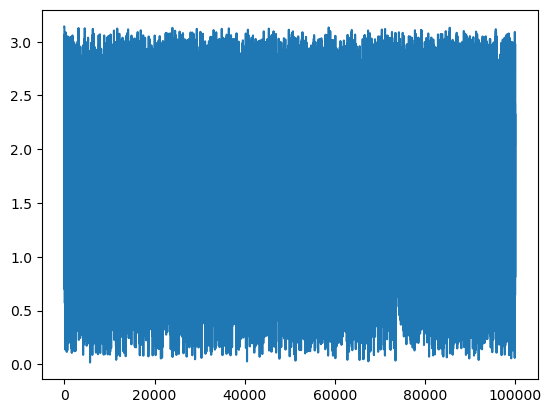

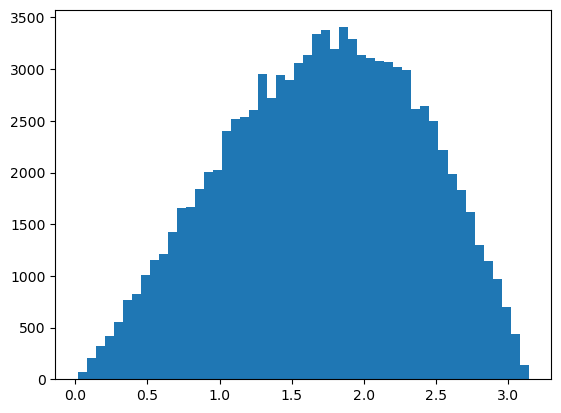

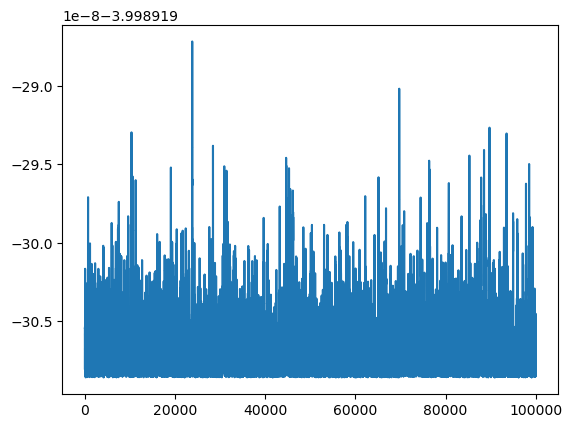

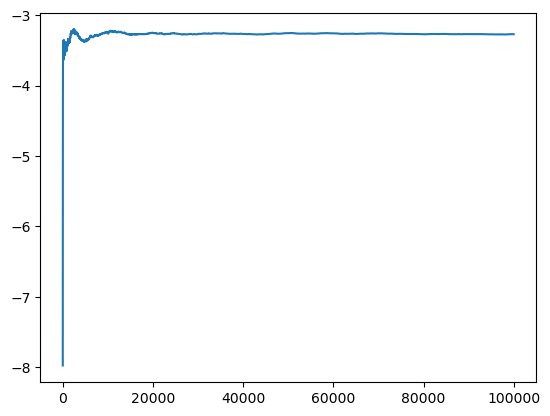

In [122]:
thetas = theta(data[:,:3], data[:,3:-1])
plt.plot(thetas)
plt.show()
plt.hist(thetas, bins=50)
plt.show()
energies = energy(data[:,:3], data[:,3:-1], 0.1)
plt.plot(energies)
plt.show()
cum_energy = np.cumsum(data[:,-1])
plt.plot(cum_energy[1:]/(np.arange(cum_energy.shape[0]-1)+1))
plt.show()

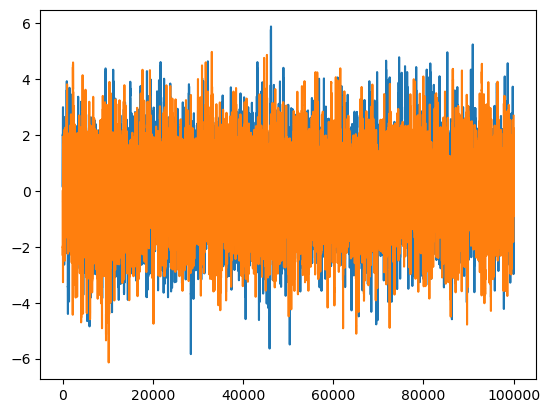

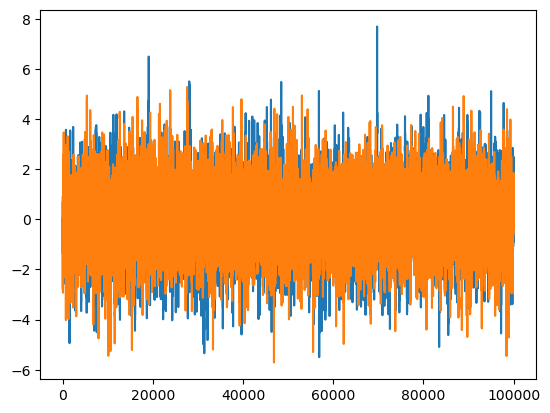

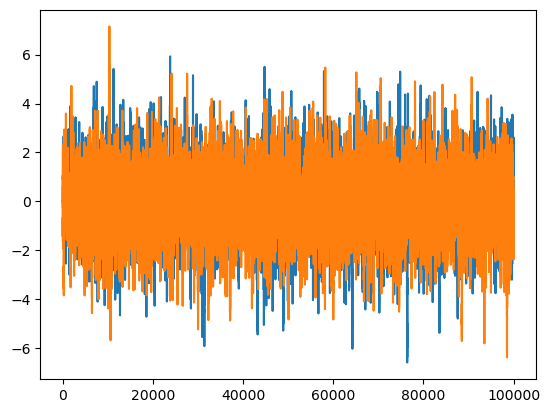

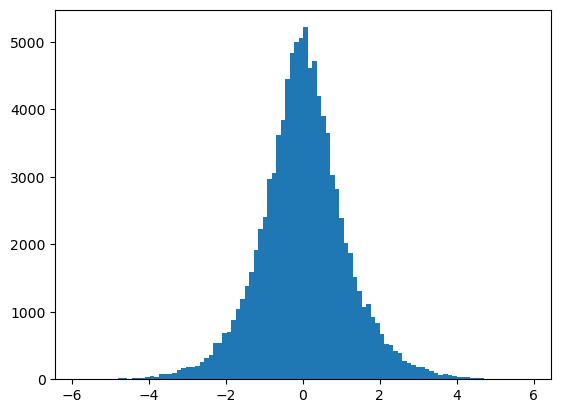

In [123]:
plt.plot(data[:,0], label='$r_{1,x}$')
plt.plot(data[:,3], label='$r_{2,x}$')
plt.show()
plt.plot(data[:,1], label='$r_{1,y}$')
plt.plot(data[:,4], label='$r_{2,y}$')
plt.show()
plt.plot(data[:,2], label='$r_{1,z}$')
plt.plot(data[:,5], label='$r_{2,z}$')
plt.show()

plt.hist(data[:,0], bins=100)
plt.show()